# EDA on Help Desk Database
-----

This database is from Kaggle site and contains the following **features**:
- ticket = ticket id
- requestor	= applicant id
- RequestorSeniority = 1 - Junior, 2 - Regular, 3 - Senior or 4 - Management 
- ITOwner = owner/responsible id	
- FiledAgainst = issue area
- TicketType = Issue or Request
- Severity = 1 - Minor, 2 - Normal, 3 - Major or 4 - Critical
- Priority = assigned priority: 0 - Unassigned, 1 - Low, 2 - Medium or 3 - High
- daysOpen = how many days it's open
- Satisfaction = 0 - Unknown, 1 - Unsatisfied, 2 - Satisfied or 3 - Highly satisfied

**Goal:** this is just a initial Exploratory Data Analysis to try to catch some correlations betweens features to understand more the business.

**Tools:** python, jupiternotebook, numpy, pandas, matplotlib, seaborn.

In [1]:
#importing usual libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go

In [2]:
#looking what we have in the data frame

df = pd.read_csv('WA_Fn-UseC_-IT-Help-Desk.csv')
df.head(5)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction
0,1,1929,1 - Junior,50,Systems,Issue,2 - Normal,0 - Unassigned,3,1 - Unsatisfied
1,2,1587,2 - Regular,15,Software,Request,1 - Minor,1 - Low,5,1 - Unsatisfied
2,3,925,2 - Regular,15,Access/Login,Request,2 - Normal,0 - Unassigned,0,0 - Unknown
3,4,413,4 - Management,22,Systems,Request,2 - Normal,0 - Unassigned,20,0 - Unknown
4,5,318,1 - Junior,22,Access/Login,Request,2 - Normal,1 - Low,1,1 - Unsatisfied


In [3]:
#info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ticket              100000 non-null  int64 
 1   requestor           100000 non-null  int64 
 2   RequestorSeniority  100000 non-null  object
 3   ITOwner             100000 non-null  int64 
 4   FiledAgainst        100000 non-null  object
 5   TicketType          100000 non-null  object
 6   Severity            100000 non-null  object
 7   Priority            100000 non-null  object
 8   daysOpen            100000 non-null  int64 
 9   Satisfaction        100000 non-null  object
dtypes: int64(4), object(6)
memory usage: 7.6+ MB


In [4]:
#transformming categorical attributes

df['RequestorSeniority'].replace(to_replace='1 - Junior',value=1,inplace=True)
df['RequestorSeniority'].replace(to_replace='2 - Regular',value=2,inplace=True)
df['RequestorSeniority'].replace(to_replace='3 - Senior',value=3,inplace=True)
df['RequestorSeniority'].replace(to_replace='4 - Management',value=4,inplace=True)

df['Severity'].replace(to_replace='0 - Minor',value=0,inplace=True)
df['Severity'].replace(to_replace='1 - Normal',value=1,inplace=True)
df['Severity'].replace(to_replace='2 - Major',value=2,inplace=True)
df['Severity'].replace(to_replace='3 - Critical',value=3,inplace=True)

df['Priority'].replace(to_replace='0 - Unassigned',value=0,inplace=True)
df['Priority'].replace(to_replace='1 - Low',value=1,inplace=True)
df['Priority'].replace(to_replace='2 - Medium',value=2,inplace=True)
df['Priority'].replace(to_replace='3 - High',value=3,inplace=True)

df['Satisfaction'].replace(to_replace='0 - Unknown',value=0,inplace=True)
df['Satisfaction'].replace(to_replace='1 - Unsatisfied',value=1,inplace=True)
df['Satisfaction'].replace(to_replace='2 - Satisfied',value=2,inplace=True)
df['Satisfaction'].replace(to_replace='3 - Highly satisfied',value=3,inplace=True)

In [5]:
df.head(5)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction
0,1,1929,1,50,Systems,Issue,2 - Normal,0,3,1
1,2,1587,2,15,Software,Request,1 - Minor,1,5,1
2,3,925,2,15,Access/Login,Request,2 - Normal,0,0,0
3,4,413,4,22,Systems,Request,2 - Normal,0,20,0
4,5,318,1,22,Access/Login,Request,2 - Normal,1,1,1


<AxesSubplot:>

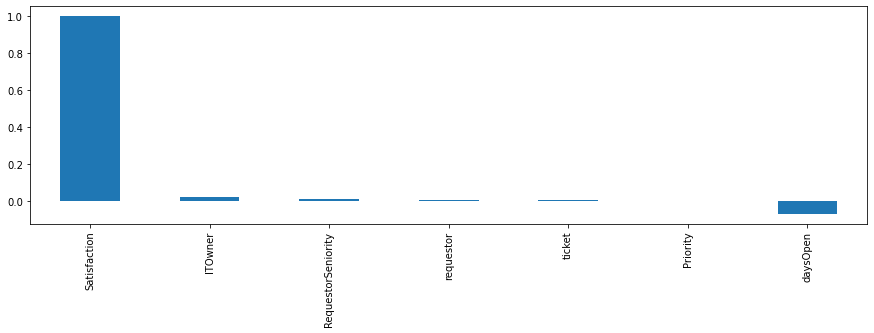

In [61]:
#looking for posible correlations

plt.figure(figsize=(15,4))
df.corr()['Satisfaction'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

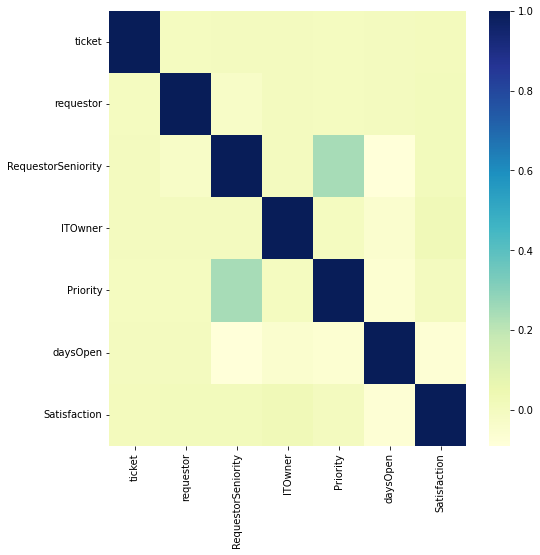

In [74]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='YlGnBu')


<AxesSubplot:xlabel='Satisfaction', ylabel='daysOpen'>

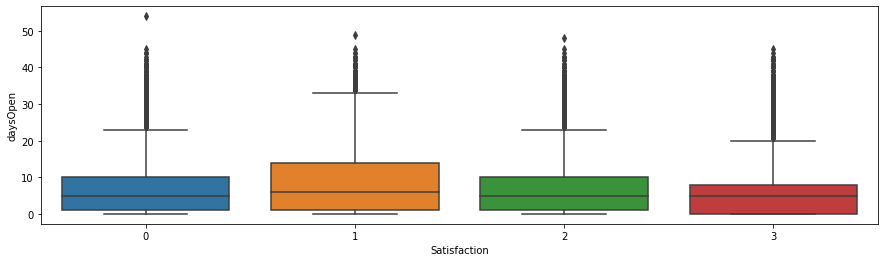

In [54]:
plt.figure(figsize=(15,4))
sns.boxplot(x='Satisfaction',y='daysOpen',data=df)

#There's some low satisfaction even with less days of open ticket. Let's check.

<AxesSubplot:xlabel='daysOpen', ylabel='Satisfaction'>

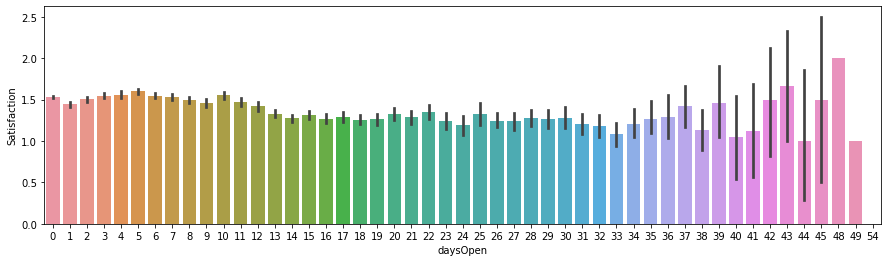

In [71]:
plt.figure(figsize=(15,4))
sns.barplot(x='daysOpen',y='Satisfaction',data=df)

<AxesSubplot:xlabel='Satisfaction', ylabel='Severity'>

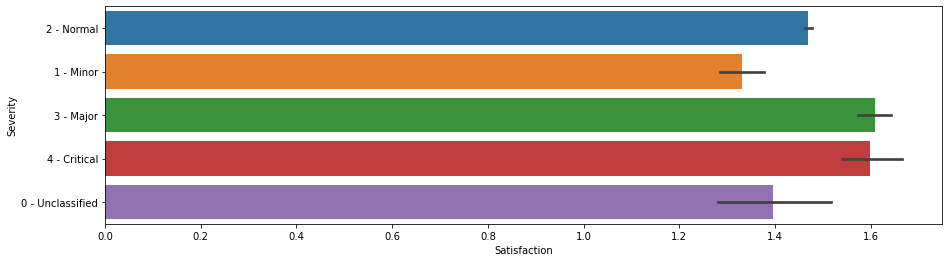

In [56]:
plt.figure(figsize=(15,4))
sns.barplot(x='Satisfaction',y='Severity',data=df)

#There's low satisfaction with Minor Severity. Let's look inside it
#On the opposity way, there's high satisfaction when it's a Major or Critical Severity

<AxesSubplot:xlabel='Satisfaction', ylabel='Priority'>

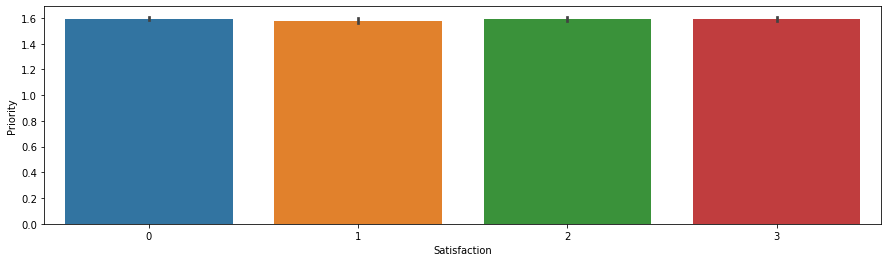

In [77]:
plt.figure(figsize=(15,4))
sns.barplot(x='Satisfaction',y='Priority',data=df)

#No significant correlation

# Conclusion

There's just a low correlation between Satisfation and Severity of the case. 

**Assumption:*** when it's a more difficult case and it's solved, probably, the requester get more satisfied. 

*an important data that we don't have in this dataset is if the case was solved. So, it's just an assumption and will need more data to explain posible attributes correlations with Satisfaction.

There's not enough correlation to construct a predictive ML. Let's use a Looker dashboard to see the data another way for posible insights.